In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pylab as plt

from IPython.display import display
pd.options.display.max_columns = None

# Изучение данных

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.19366,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,-0.303139,4.092090,3.22617,0.074799,0.259497,289.4920,327.4650,5.389310,7.39479,-0.489950,20.2923,2.45660,1.447720,-10639.0,85.6005,-0.178513,2815,-234.772,1.83317,88.5605,0.367916,8.575340e+09,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.07217,65.1543,0.022504,-5.6068,1.798660,0.528068,6696.300,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.02020,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,1.079530,0.711923,2.90602,0.051206,0.755122,140.8930,29.5252,14.229600,3.53213,-0.405681,42.5357,1.43533,0.939771,138312.0,59.8810,-0.070959,1435,1046.880,1.56770,29.4306,2.455150,4.518200e+09,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.46258,43.1121,-0.060801,64.0455,2.358450,5.759690,3958.140,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.69954,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,0.926980,0.741116,2.42205,0.260362,0.626639,369.5790,370.0240,4.488930,7.84290,1.196010,43.5343,2.59182,1.256710,168881.0,83.8419,2.713230,2911,23256.900,3.91896,97.5578,4.385380,8.444970e+08,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.22245,50.2267,-0.026215,71.6849,2.434170,1.904560,27165.800,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.80900,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,1.333210,-5.793170,1.56512,0.309483,0.134558,84.8637,24.3353,4.871200,2.55104,-0.372300,14.8960,1.10013,0.892193,17006.6,78.4078,0.425686,1723,375.240,1.94539,98.1500,-0.109164,3.543970e+09,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.41530,116.1820,0.018674,55.4428,2.228240,4.303600,2643.760,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,1.77348,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [4]:
df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,1.190382,0.063664,0.095226,136.746037,8.034918,0.614930,0.752971,8.891112e+06,0.009645,0.041674,0.074226,0.321328,9.928838,3622.094586,7.413526,-0.480271,6.046948,137.635093,47223.903504,5.469358,7.155835,1.206363,6.461029,-0.018490,1.574449,136.830167,173.530314,6.283875,0.157174,0.502435,0.848153,1.424413,2.364249,0.134738,0.428217,115.320117,113.637385,7.092164,5.100105,-0.095555,87.844474,1.894125,0.847267,18152.791289,85.435271,0.488945,1003.602256,4302.990496,2.108318,86.370082,0.508351,3.882984e+09,68.257992,4.672625,0.214381,1.194280,0.474751,0.216206,0.939638,1.668524,0.918009,68.939811,0.012219,64.709567,2.239319,3.495883,4430.718917,-0.159048,0.734153,6.416185,1.185112,1.973585,0.014504,-0.455453,0.245507,3.893001,4.400483,253.135672,0.258360,7.154004,7.759941,0.581002,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,0.099700,2.433281,0.935765,14.422095,5.487786,1.619192,0.626172,8.508967e+06,0.103460,0.684975,0.739724,0.337792,5.661423,6328.918702,3.740530,0.712486,3.172873,15.710846,36013.179913,7.716520,3.443207,0.134848,2.451240,0.787275,1.109286,14.816130,201.166381,3.530354,1.728653,1.789297,0.627197,6.473798,1.227176,0.084534,0.182512,104.562112,100.874754,3.647758,3.211041,0.792784,70.327252,0.706721,0.684846,36933.551576,17.757335,1.004355,802.554355,7446.656939,0.945911,16.988538,0.981327,2.279121e+09,35.655549,2.913057,0.101787,0.099982,0.218068,0.098362,0.732696,10.179813,2.854904,38.940318,0.090087,31.343334,0.735150,1.935741,8050.232085,0.840284,3.344094,2.016620,0.101610,0.689412,0.025504,0.228070,0.700630,1.592608,1.089594,338.972888,0.703873,3.698234,11.378365,0.445022,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,0.934037,-10.261200,-1.858720,108.086000,-2.115510,-8.648960,-1.805330,-1.173084e+06

# Подготовка данных

- Заполнение или удаление пропусков

In [5]:
# Пропусков нет

# Анализ данных 

## Распределение 

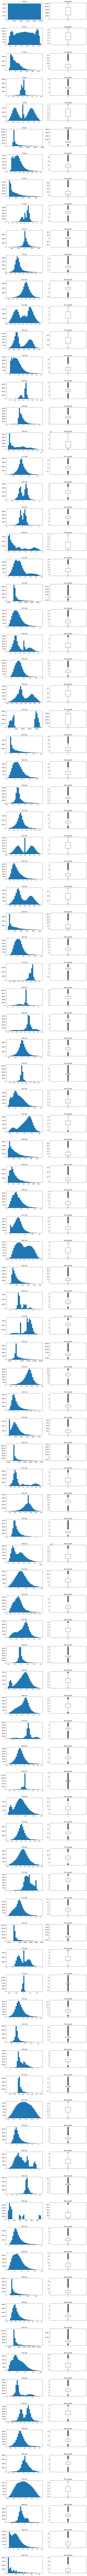

In [37]:
fig, axs = plt.subplots(len(df.columns), 2, figsize=(12,60))

n_bints = 30
y_offset = 5

plt.subplots_adjust(top=5, bottom=0, hspace=.5)

for i in range(len(df.columns)):
    col = df.columns[i]
    
    axs[i][0].set_title(col+' hist')
    axs[i][1].set_title(col+' boxplot')
    
    axs[i][0].hist(df[col], bins=n_bints)
    axs[i][1].boxplot(df[col])


## Корреляция

In [20]:
df.corr()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,1.000000,0.000625,0.000333,0.000876,-0.000328,0.001605,-0.001489,-0.002093,0.001868,-0.006448,0.002393,-0.002228,-0.000869,-0.001399,0.000237,-0.001203,-0.000255,-0.004194,-0.000190,0.004639,-0.001501,-0.000174,-0.001166,0.000010,-0.002645,0.001443,0.002277,-0.001516,0.002338,-0.000177,-0.000903,-0.002768,0.000565,-0.000855,-0.000871,0.000487,0.000170,-0.000304,0.001460,0.004882,0.001112,0.003687,0.000842,0.000314,-0.001017,0.004449,0.001240,-0.001580,0.002239,-0.002985,-0.001625,0.000225,0.004147,0.000476,0.001118,0.003724,-0.003378,-0.001644,0.001408,-0.001670,-0.002290,0.004328,0.004254,-0.003533,0.003240,-0.000339,-0.006241,-0.000701,0.000766,-0.001939,0.001545,0.001970,-0.000880,0.001386,-0.000269,-0.001895,-0.004284,0.002069,0.002216,-0.001980,-0.002743,0.001956,-0.005361,-0.000223,0.004256,0.001861,-0.001551,0.000429,-0.003595,-0.001425,0.001034,-0.000110,0.000919,-0.000568,0.003579,0.000276,0.000059,0.001217,0.007288,0.003547,0.001189,0.001020
f0,0.000625,1.000000,-0.004339,-0.004808,0.004662,0.001170,0.012141,0.002686,-0.003814,-0.000343,-0.007426,0.002852,-0.011129,0.006671,0.016323,0.002159,0.006979,0.003048,0.002987,0.011259,-0.006806,0.002673,-0.003676,-0.010313,-0.007437,-0.002003,-0.000222,0.011491,-0.000688,-0.004125,-0.000790,-0.006728,0.007992,0.008025,0.003360,0.000380,0.002429,0.000762,0.004753,0.005545,0.003745,-0.002652,-0.000844,-0.005031,-0.011736,-0.001125,-0.001575,-0.004361,-0.005510,-0.002440,-0.005345,-0.004037,0.003029,-0.005417,-0.004501,0.004192,0.004534,-0.003250,-0.004354,0.001361,0.000772,0.006516,-0.000024,-0.006133,0.004114,0.000142,-0.000131,-0.013484,-0.000609,0.010863,0.010468,-0.000117,-0.003921,0.000694,-0.004010,0.005217,0.013212,-0.002975,0.008004,-0.004434,0.008075,-0.001495,-0.000214,-0.000311,0.013692,0.003405,-0.009292,0.002168,0.001788,0.008519,-0.004024,0.004457,0.001487,-0.010135,0.006754,0.000346,0.002566,-0.003691,0.000916,-0.005810,0.010797,0.008921
f1,0.000333,-0.004339,1.000000,-0.005421,0.000400,-0.002447,0.012614,-0.001040,-0.004030,-0.014389,0.002277,0.014083,-0.000023,0.009007,0.000058,-0.001461,0.002241,0.005774,-0.005579,-0.002796,-0.002909,-0.005902,-0.004420,-0.000284,0.012254,0.007612,-0.002469,-0.003194,-0.000993,0.007772,0.008089,0.004737,-0.000374,0.007414,0.010907,0.000842,0.004428,-0.007986,0.010490,-0.002065,-0.002680,-0.000093,0.011884,-0.006966,0.002381,0.000221,-0.000051,0.008134,-0.005755,-0.020660,0.011159,0.000800,0.002848,-0.001539,0.013374,0.003022,-0.001888,0.011025,-0.001967,-0.009692,-0.002248,0.003332,-0.003054,-0.016643,0.004907,0.015325,0.002148,-0.002642,0.007553,0.002097,0.007109,-0.006184,0.006653,-0.004572,0.001087,0.011107,0.002765,0.001576,-0.000922,-0.011008,-0.000402,0.007026,0.006741,-0.002686,-0.003026,0.003214,0.007369,0.002761,0.001005,-0.002728,-0.001524,-0.011887,-0.004757,-0.005882,0.000846,0.018600,0.003927,-0.010261,0.001508,-0.009793,-0.002633,0.011847
f2,0.000876,-0.004808,-0.005421,1.000000,-0.007057,-0.004661,-0.015663,-0.002435,-0.008019,-0.001225,-0.011955,0.005394,0.004100,-0.002582,-0.011836,0.002604,0.002469,0.002886,-0.004163,-0.020238,-0.000995,-0.001444,0.013192,-0.013199,-0.002376,0.009503,-0.019411,-0.009402,0.003751,0.011396,0.009249,0.007058,-0.005693,-0.005668,0.026939,0.007577,0.000373,-0.003186,-0.011018,0.011487,-0.006934,0.002222,-0.003555,-0.003098,-0.016208,0.013900,0.016725,-0.019453,0.006724,0.012223,-0.003860,-0.006351,-0.002579,-0.009227,0.008706,-0.006925,-0.004612,-0.001510,-0.002754,0.009204,0.006753,0.001007,0.006407,-0.001182,-0.005979,0.003603,0.001453,0.011849,-0.008353,-0.012459,-0.015908,0.006498,

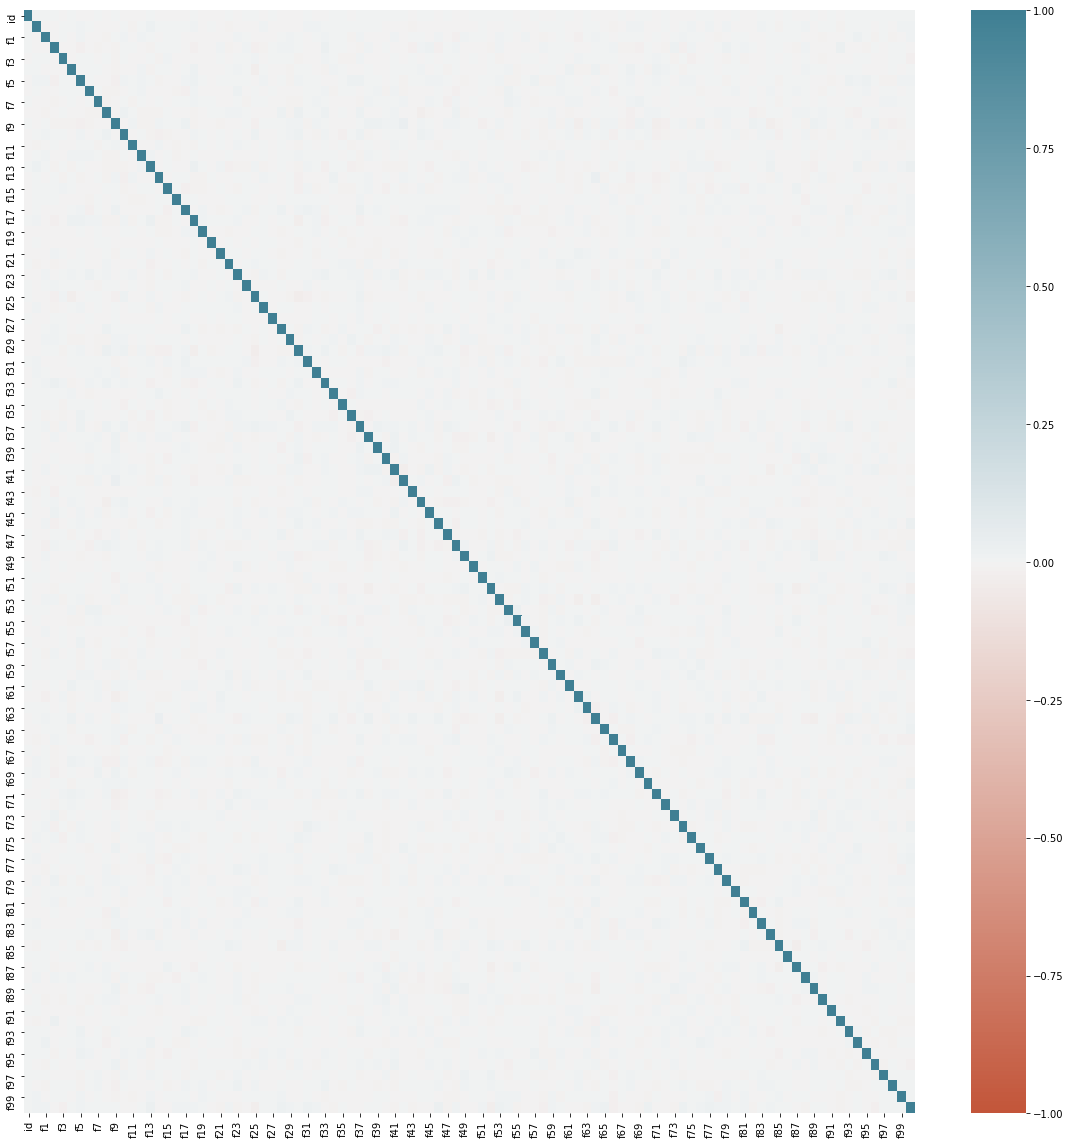

In [21]:
fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

### Корреляции почти нет

## Точечная диаграмма

In [22]:
df.scatter()

AttributeError: 'DataFrame' object has no attribute 'scatter'

## 

# Обучение моделей

# Диагностика моделей

- $ R^2 $
- График остатков

# Вывод